# LSTUR: Analysis of Hyperparameter Optimization Results
This notebook provides analysis of the results obtained from the hyperparameter optimization for the LSTUR model, focusing on the effectiveness of different parameter configurations. The primary goal is to visualize and quantify the impact of each hyperparameter on the model's performance metrics.

LSTUR \[2\] is a news recommendation approach that captures users' both long-term preferences and short-term interests. The core of LSTUR is composed of a news encoder and a user encoder. The news encoder learns representations of news from their titles, while the user encoder learns long-term user representations from the embeddings of their IDs and short-term user representations from their recently browsed news via a GRU network.

## Properties of LSTUR:

- **Dual User Representations**: LSTUR captures both short-term and long-term preferences by using embeddings of users' IDs for long-term user representations and a GRU network to learn short-term user representations from recently browsed articles.
- **News Encoder**: Utilizes the news titles to generate news representations.
- **User Encoder**: Combines long-term and short-term user representations. Two methods are proposed for this combination:
  - Initializing the hidden state of the GRU network with the long-term user representation.
  - Concatenating both long-term and short-term user representations to form a unified user vector.
 
\[1\] https://github.com/ebanalyse/ebnerd-benchmark

\[2\] https://aclanthology.org/P19-1033/

In [1]:
import os
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

## Hyperparameter Grid Definition
This cell initializes the `param_grid` dictionary containing potential values for different hyperparameters of the LSTUR model. It then generates a list of all possible combinations of these parameters using a Cartesian product. This setup is essential for the subsequent steps of hyperparameter optimization, where each combination will be evaluated.

In [2]:
param_grid = {
    'history_size': [10, 50, 100],
    'n_users': [20000, 50000, 70000],
    'title_size': [10, 50, 100],
    'learning_rate': [0.0001, 0.001, 0.01],
    'dropout':  [0.1, 0.3, 0.5]
}

combinations_1 = list(itertools.product(
    param_grid['history_size'], param_grid['n_users'], param_grid['title_size']
))
combinations_2 = list(itertools.product(
    param_grid['learning_rate'], param_grid['dropout']
))

## Model Evaluation Results Processing
This cell iterates through all combinations of hyperparameters generated previously to collect the evaluation results.

In [3]:
hyperopt_1_results = []
hyperopt_2_results = []

for history_size, n_users, title_size in combinations_1:
    LSTUR = f"../hyperopt/LSTUR_h{history_size}_u{n_users}_t{title_size}"
    NRMS = f"../hyperopt/NRMS_h{history_size}_t{title_size}"
    lstur_file = os.path.join(LSTUR, 'evaluation_results.txt')
    nrms_file = os.path.join(NRMS, 'evaluation_results.txt')
    
    if os.path.exists(lstur_file):
        with open(lstur_file, 'r') as file:
            # Read the results from the file
            eval_results = {'model': 'LSTUR', 'history_size': history_size, 'title_size': title_size}
            # eval_results = {'model': 'LSTUR', 'learning_rate': learning_rate, 'dropout': dropout}
            for line in file:
                key, value = line.strip().split(': ')
                eval_results[key] = float(value)
            hyperopt_1_results.append(eval_results)

    if os.path.exists(nrms_file):
        with open(nrms_file, 'r') as file:
            # Read the results from the file
            eval_results = {'model': 'NRMS', 'history_size': history_size, 'title_size': title_size}
            # eval_results = {'model': 'NRMS', 'learning_rate': learning_rate, 'dropout': dropout}
            for line in file:
                key, value = line.strip().split(': ')
                eval_results[key] = float(value)
            hyperopt_1_results.append(eval_results)


for learning_rate, dropout in combinations_2:
    LSTUR = f"../hyperopt/LSTUR_l{learning_rate}_d{dropout}"
    NRMS = f"../hyperopt/NRMS_l{learning_rate}_d{dropout}"
    lstur_file = os.path.join(LSTUR, 'evaluation_results.txt')
    nrms_file = os.path.join(NRMS, 'evaluation_results.txt')
    
    if os.path.exists(lstur_file):
        with open(lstur_file, 'r') as file:
            eval_results = {'model': 'LSTUR', 'learning_rate': learning_rate, 'dropout': dropout}
            for line in file:
                key, value = line.strip().split(': ')
                eval_results[key] = float(value)
            hyperopt_2_results.append(eval_results)

    if os.path.exists(nrms_file):
        with open(nrms_file, 'r') as file:
            eval_results = {'model': 'NRMS', 'learning_rate': learning_rate, 'dropout': dropout}
            for line in file:
                key, value = line.strip().split(': ')
                eval_results[key] = float(value)
            hyperopt_2_results.append(eval_results)

# Visualization and Analysis of Model Performance Metrics

The following cells contain code for visualizing and analyzing the model performance based on the collected hyperparameter evaluation results. We use heatmaps to provide a clear visual representation of how different hyperparameter combinations and specific parameters like dropout rates affect model accuracy metrics.

In [4]:
df1 = pd.DataFrame(hyperopt_1_results)
df1 = df1.groupby(['model', 'history_size', 'title_size']).mean().reset_index()


In [5]:
df2 = pd.DataFrame(hyperopt_2_results)
df2

,model,learning_rate,dropout,auc,mrr,ndcg@5,ndcg@10
0,LSTUR,0.0001,0.1,0.534073,0.336484,0.371266,0.448404
1,NRMS,0.0001,0.1,0.524407,0.323344,0.360409,0.432551
2,LSTUR,0.0001,0.3,0.531536,0.330405,0.364859,0.446696
3,NRMS,0.0001,0.3,0.494327,0.299066,0.320888,0.411498
4,LSTUR,0.0001,0.5,0.526923,0.325328,0.360998,0.439484
5,NRMS,0.0001,0.5,0.516152,0.315784,0.348594,0.429085
6,LSTUR,0.0010,0.1,0.543749,0.335093,0.374928,0.452880
7,NRMS,0.0010,0.1,0.498663,0.309647,0.348758,0.419928
8,LSTUR,0.0010,0.3,0.540918,0.338172,0.374232,0.451736
9,NRMS,0.0010,0.3,0.527843,0.320788,0.354232,0.437022


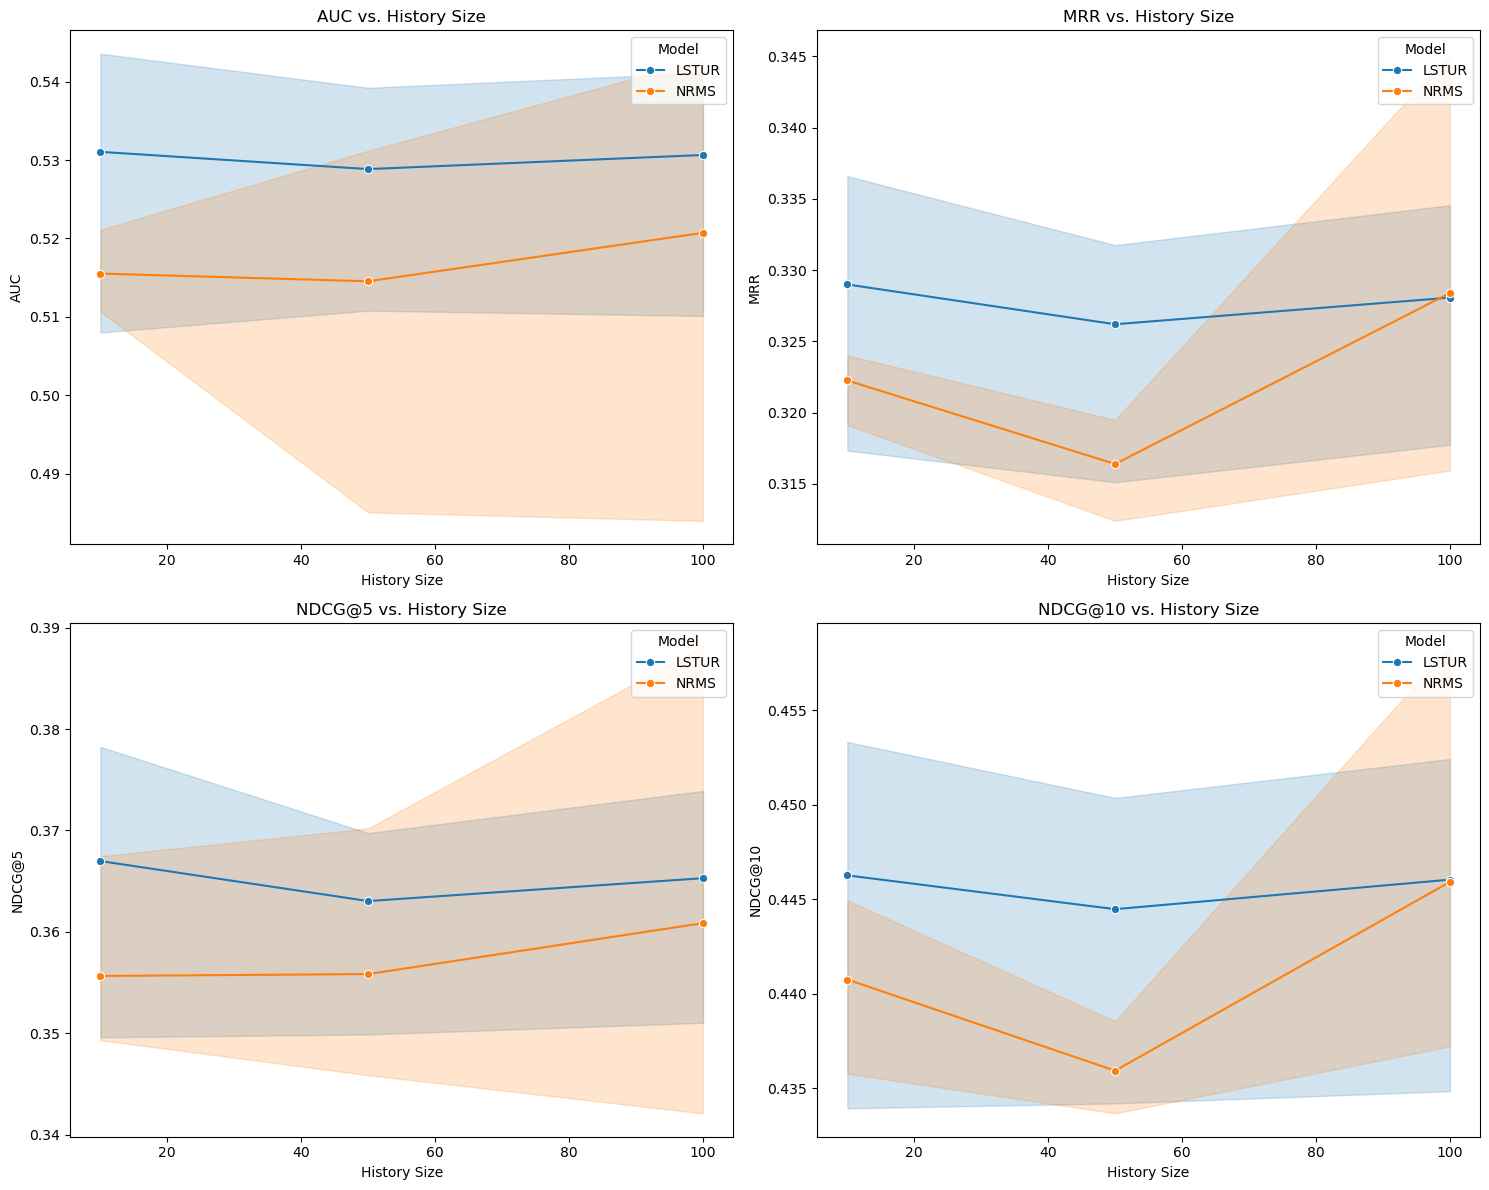

In [9]:
metrics = ['auc', 'mrr', 'ndcg@5', 'ndcg@10']
titles = ['AUC', 'MRR', 'NDCG@5', 'NDCG@10']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, metric in enumerate(metrics):
    sns.lineplot(data=df1, x='history_size', y=metric, hue='model', marker='o', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{titles[i]} vs. History Size')
    axes[i//2, i%2].set_xlabel('History Size')
    axes[i//2, i%2].set_ylabel(titles[i])
    axes[i//2, i%2].legend(title='Model')

plt.tight_layout()
plt.show()

In [15]:
g = sns.FacetGrid(df_melted, row="model", col="title_size", margin_titles=True, height=4, hue="metric", palette="Set1")
g.map(sns.lineplot, "history_size", "value", marker="o")
g.set_axis_labels("History Size", "Accuracy")
g.set_titles(col_template="Title Size: {col_name}", row_template="{row_name}")
g.add_legend(title="Metric")

plt.savefig(f='fig1.png)
plt.show()

KeyError: 'metric'

/tmp/ipykernel_9888/2655182785.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table_lstur = df_aggregated[df_aggregated['model'] == 'LSTUR'].pivot("learning_rate", "dropout", "auc")
/tmp/ipykernel_9888/2655182785.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table_nrms = df_aggregated[df_aggregated['model'] == 'NRMS'].pivot("learning_rate", "dropout", "auc")


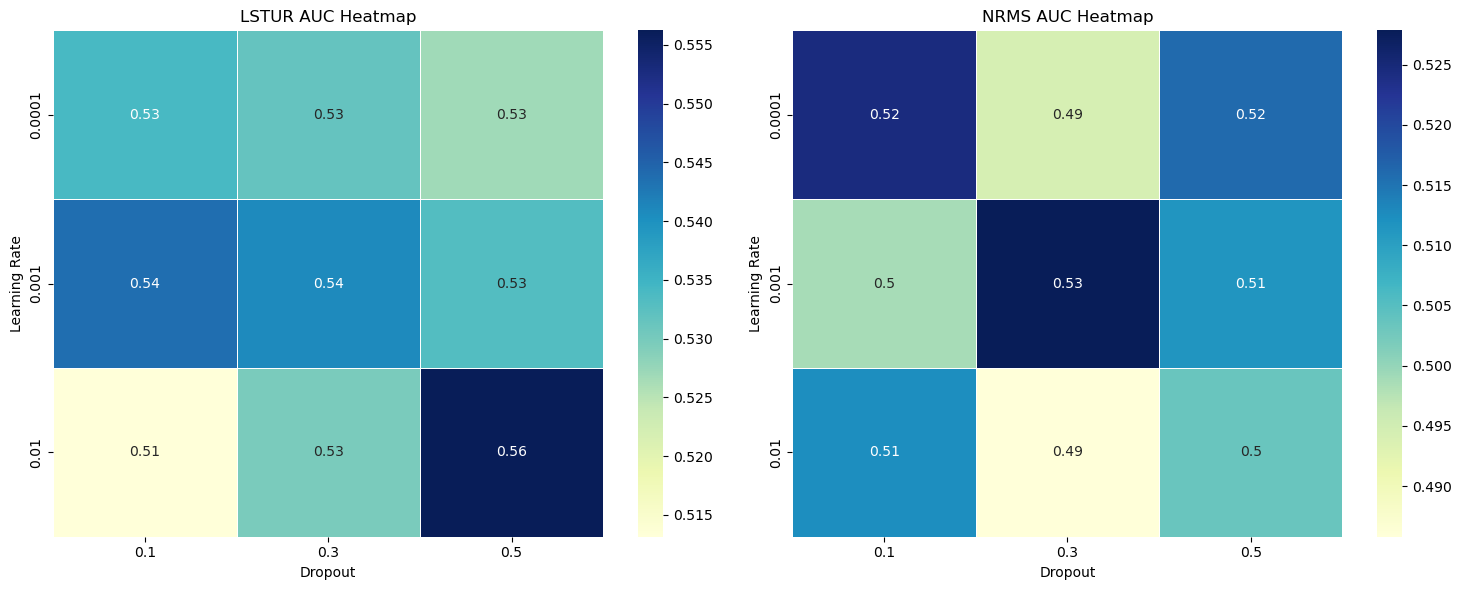

In [13]:
df_aggregated = df2.groupby(['model', 'learning_rate', 'dropout']).mean().reset_index()

pivot_table_lstur = df_aggregated[df_aggregated['model'] == 'LSTUR'].pivot("learning_rate", "dropout", "auc")
pivot_table_nrms = df_aggregated[df_aggregated['model'] == 'NRMS'].pivot("learning_rate", "dropout", "auc")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(pivot_table_lstur, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[0])
axes[0].set_title('LSTUR AUC Heatmap')
axes[0].set_xlabel('Dropout')
axes[0].set_ylabel('Learning Rate')

sns.heatmap(pivot_table_nrms, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[1])
axes[1].set_title('NRMS AUC Heatmap')
axes[1].set_xlabel('Dropout')
axes[1].set_ylabel('Learning Rate')

plt.tight_layout()
plt.savefig(fname='fig2.png')
plt.show()